## Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating Input and Output Data for AND, OR, XOR Gate

In [ ]:
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_AND = np.array([0, 0, 0, 1])


X_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_OR = np.array([0, 1, 1, 1])

X_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_XOR = np.array([0, 1, 1, 0])


## Sigmoid Activation Functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def derivative_sigmoid(x):
    return x*(1-x)

## Crossentropy Loss Functions

In [ ]:
def Cross_Entropy(y_hat, y):
    if y == 1:
      return -np.log(y_hat)
    else:
      return -np.log(1 - y_hat)
def derivative_Cross_Entropy(y_hat, y):
    if y == 1:
      return -1/y_hat
    else:
      return 1 / (1 - y_hat)

## Function to plot results

In [ ]:
def plot(data,label, c):
    plt.figure()
    plt.grid()
    plt.xlabel("Epochs During Training")
    plt.ylabel(label)
    plt.plot(data, c=c)
    plt.show()

## Perceptron Training Function

In [ ]:
def train_perceptron(X, Y,epochs = 10000, learning_rate = 0.1):
    W_2 = np.random.uniform(low=0, high=1, size=(1,))
    W_1 = np.random.uniform(low=0, high=1, size=(1,))
    bias = np.random.uniform(low=0, high=1, size=(1,))
    error = []
    accuracies = []
    for ep in range(epochs):
        random_index = np.arange(X.shape[0])
        np.random.shuffle(random_index)
        e = []
        a = []
        for i in random_index:
            x = X[i]
            Z = W_1 * x[0] + W_2 * x[1] + bias
            Y_hat = sigmoid(Z)
            err = Cross_Entropy(Y_hat, Y[i])
            e.append(err)
            dEdW_2 = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)*x[1]
            dEdW_1 = derivative_Cross_Entropy(Y_hat, Y[i]) * derivative_sigmoid(Y_hat) * x[0]
            dEdW_0 = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)
            bias = bias - learning_rate * dEdW_0
            W_1 = W_1 - learning_rate*dEdW_1
            W_2 = W_2 - learning_rate * dEdW_2
        error.append(np.mean(e))
        accuracies.append((1 - np.mean(e) )* 100)
        
        if (ep+1) % 500 == 0:
            print(f"Epoch {ep + 1}\t    Loss: {error[-1]:.2f} ------- Accuracy: {accuracies[-1]:.2f}")
    return error, accuracies


## Training of AND Logic Gate

In [ ]:
loss, accuracies = train_perceptron(X = X_AND, Y= Y_AND, epochs = 4000, learning_rate = 0.1)

Epoch 500	    Loss: 0.08 ------- Accuracy: 91.86
Epoch 1000	    Loss: 0.04 ------- Accuracy: 95.72
Epoch 1500	    Loss: 0.03 ------- Accuracy: 97.12
Epoch 2000	    Loss: 0.02 ------- Accuracy: 97.83
Epoch 2500	    Loss: 0.02 ------- Accuracy: 98.26
Epoch 3000	    Loss: 0.01 ------- Accuracy: 98.55
Epoch 3500	    Loss: 0.01 ------- Accuracy: 98.76
Epoch 4000	    Loss: 0.01 ------- Accuracy: 98.92


## Results on AND Logic Gate

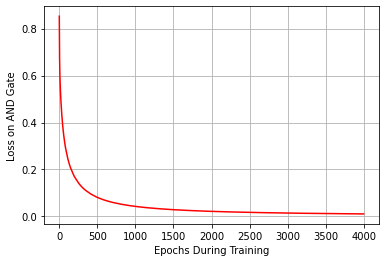

In [ ]:
plot(loss,'Loss on AND Gate', c = 'r')

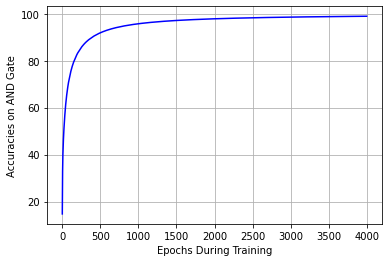

In [ ]:
plot(accuracies,'Accuracies on AND Gate', c = 'b')

## Training of OR Logic Gate

In [ ]:
loss, accuracies = train_perceptron(X=X_OR, Y=Y_OR, epochs=4000, learning_rate=0.1)

Epoch 500	    Loss: 0.05 ------- Accuracy: 95.30
Epoch 1000	    Loss: 0.02 ------- Accuracy: 97.64
Epoch 1500	    Loss: 0.02 ------- Accuracy: 98.44
Epoch 2000	    Loss: 0.01 ------- Accuracy: 98.83
Epoch 2500	    Loss: 0.01 ------- Accuracy: 99.07
Epoch 3000	    Loss: 0.01 ------- Accuracy: 99.23
Epoch 3500	    Loss: 0.01 ------- Accuracy: 99.34
Epoch 4000	    Loss: 0.01 ------- Accuracy: 99.42


## Results on OR Logic Gate

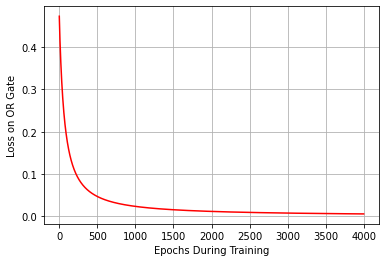

In [ ]:
plot(loss,'Loss on OR Gate', c = 'r')

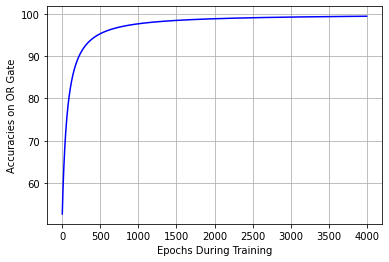

In [ ]:
plot(accuracies,'Accuracies on OR Gate', c = 'b')

## Training of XOR Logic Gate

In [ ]:
loss, accuracies = train_perceptron(X=X_XOR, Y=Y_XOR, epochs=4000, learning_rate=0.1)

Epoch 500	    Loss: 0.72 ------- Accuracy: 28.17
Epoch 1000	    Loss: 0.72 ------- Accuracy: 28.20
Epoch 1500	    Loss: 0.72 ------- Accuracy: 28.20
Epoch 2000	    Loss: 0.72 ------- Accuracy: 28.13
Epoch 2500	    Loss: 0.72 ------- Accuracy: 28.12
Epoch 3000	    Loss: 0.72 ------- Accuracy: 28.10
Epoch 3500	    Loss: 0.72 ------- Accuracy: 28.17
Epoch 4000	    Loss: 0.72 ------- Accuracy: 28.10


## Results on XOR Logic Gate

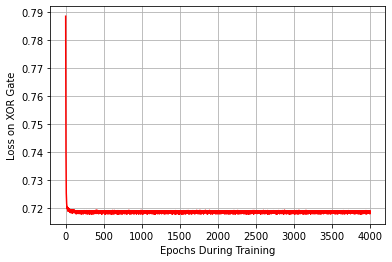

In [ ]:
plot(loss,'Loss on XOR Gate', c = 'r')

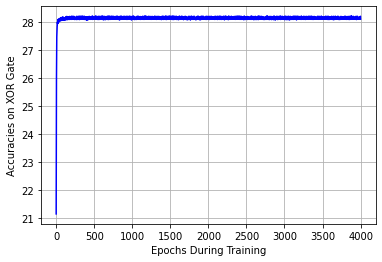

In [ ]:
plot(accuracies,'Accuracies on XOR Gate', c = 'b')